In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
Asma = np.load('Treino_teste/Asma.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = Asma['X_treino'], Asma['X_teste'], Asma['y_treino'], Asma['y_teste'], list(Asma['feature_names'])

In [3]:
len(X_treino)

30111

In [4]:
Asma_over = np.load('Treino_teste/Asma_Over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= Asma_over['X_treino'], Asma_over['X_teste'], Asma_over['y_treino'], Asma_over['y_teste'], list(Asma_over['feature_names'])

In [5]:
len(X_treino_over)

57154

In [6]:
Asma_under = np.load('Treino_teste/Asma_Under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = Asma_under['X_treino'], Asma_under['X_teste'], Asma_under['y_treino'], Asma_under['y_teste'], list(Asma_under['feature_names'])

In [7]:
len(X_treino_under)

29224

In [8]:
Asma_random_under = np.load('Treino_teste/Asma_RD_Under.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = Asma_random_under['X_treino'], Asma_random_under['X_teste'], Asma_random_under['y_treino'], Asma_random_under['y_teste'], list(Asma_random_under['feature_names'])

In [ ]:
len(X_treino_rd_under)

3068

In [10]:
Asma_DSTO = np.load('Treino_teste/Asma_DSTO.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = Asma_DSTO['X_treino'], Asma_DSTO['X_teste'], Asma_DSTO['y_treino'], Asma_DSTO['y_teste'], list(Asma_DSTO['feature_names'])

In [11]:
len(X_treino_DSTO)

57154

## Parametros e funcoes

In [12]:
param_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
def plot_decision_tree(model, feature_names, class_names, title):
    plt.figure(figsize=(30, 15))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
    plt.title(title)
    plt.show()


# Modelos

### Modelo Padrao

In [14]:
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Melhor pontuação de validação cruzada: 0.95


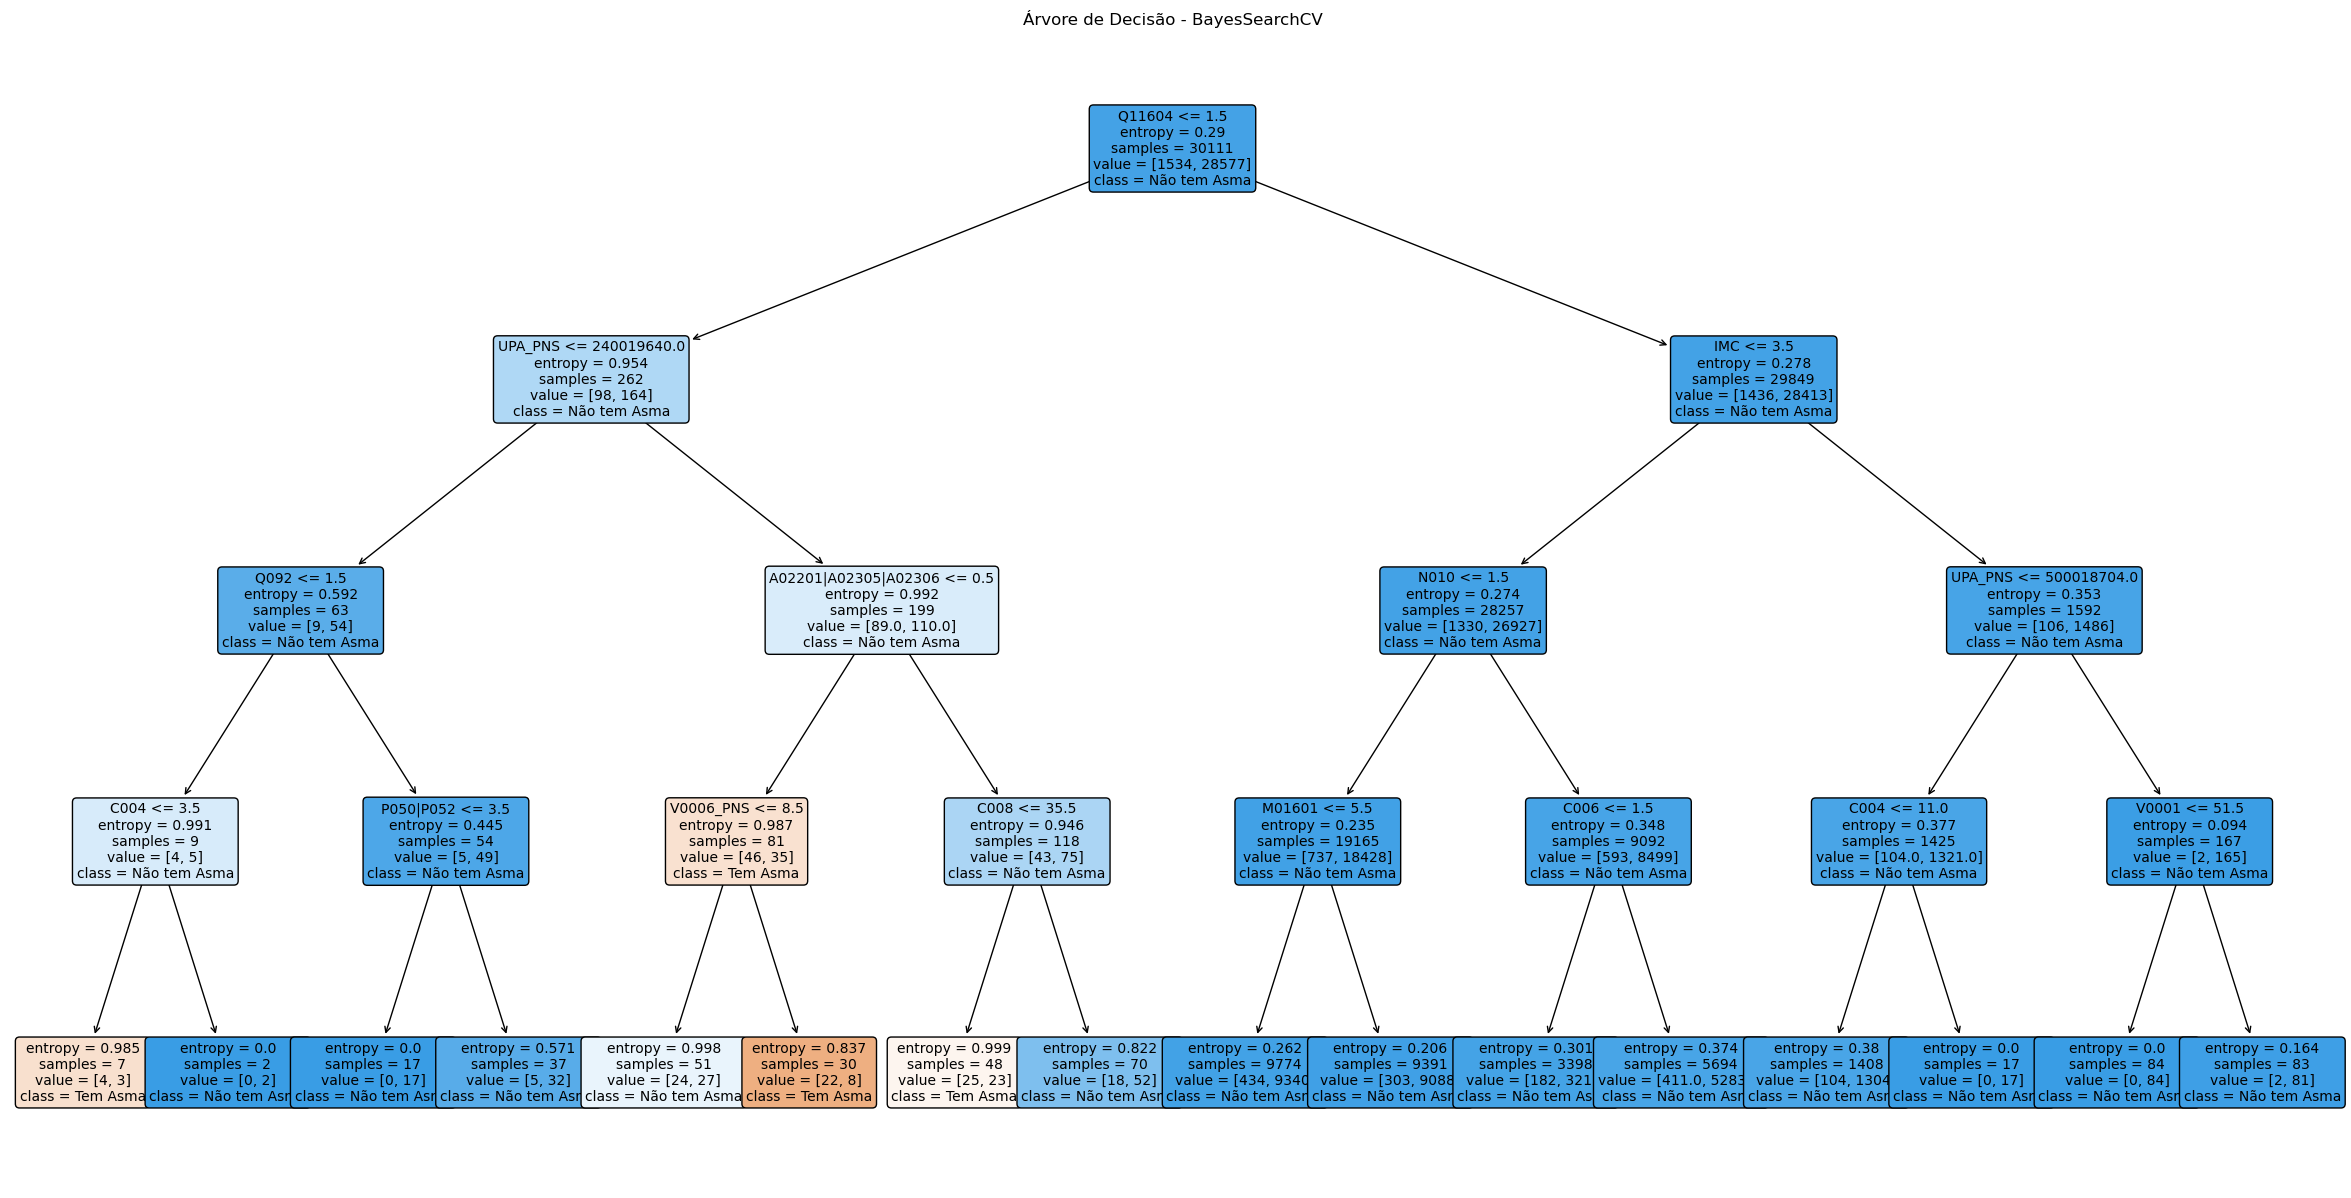

In [15]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

### Resultados

In [16]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.95


In [17]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.47      0.03      0.06       676
           2       0.95      1.00      0.97     12229

    accuracy                           0.95     12905
   macro avg       0.71      0.51      0.51     12905
weighted avg       0.92      0.95      0.92     12905



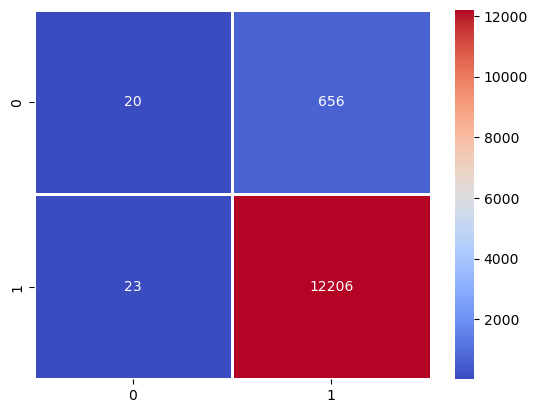

In [18]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### OverSampling

In [19]:
grid_search.fit(X_treino_over, y_treino_over)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'entropy', 'max_depth': 50, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 0.89


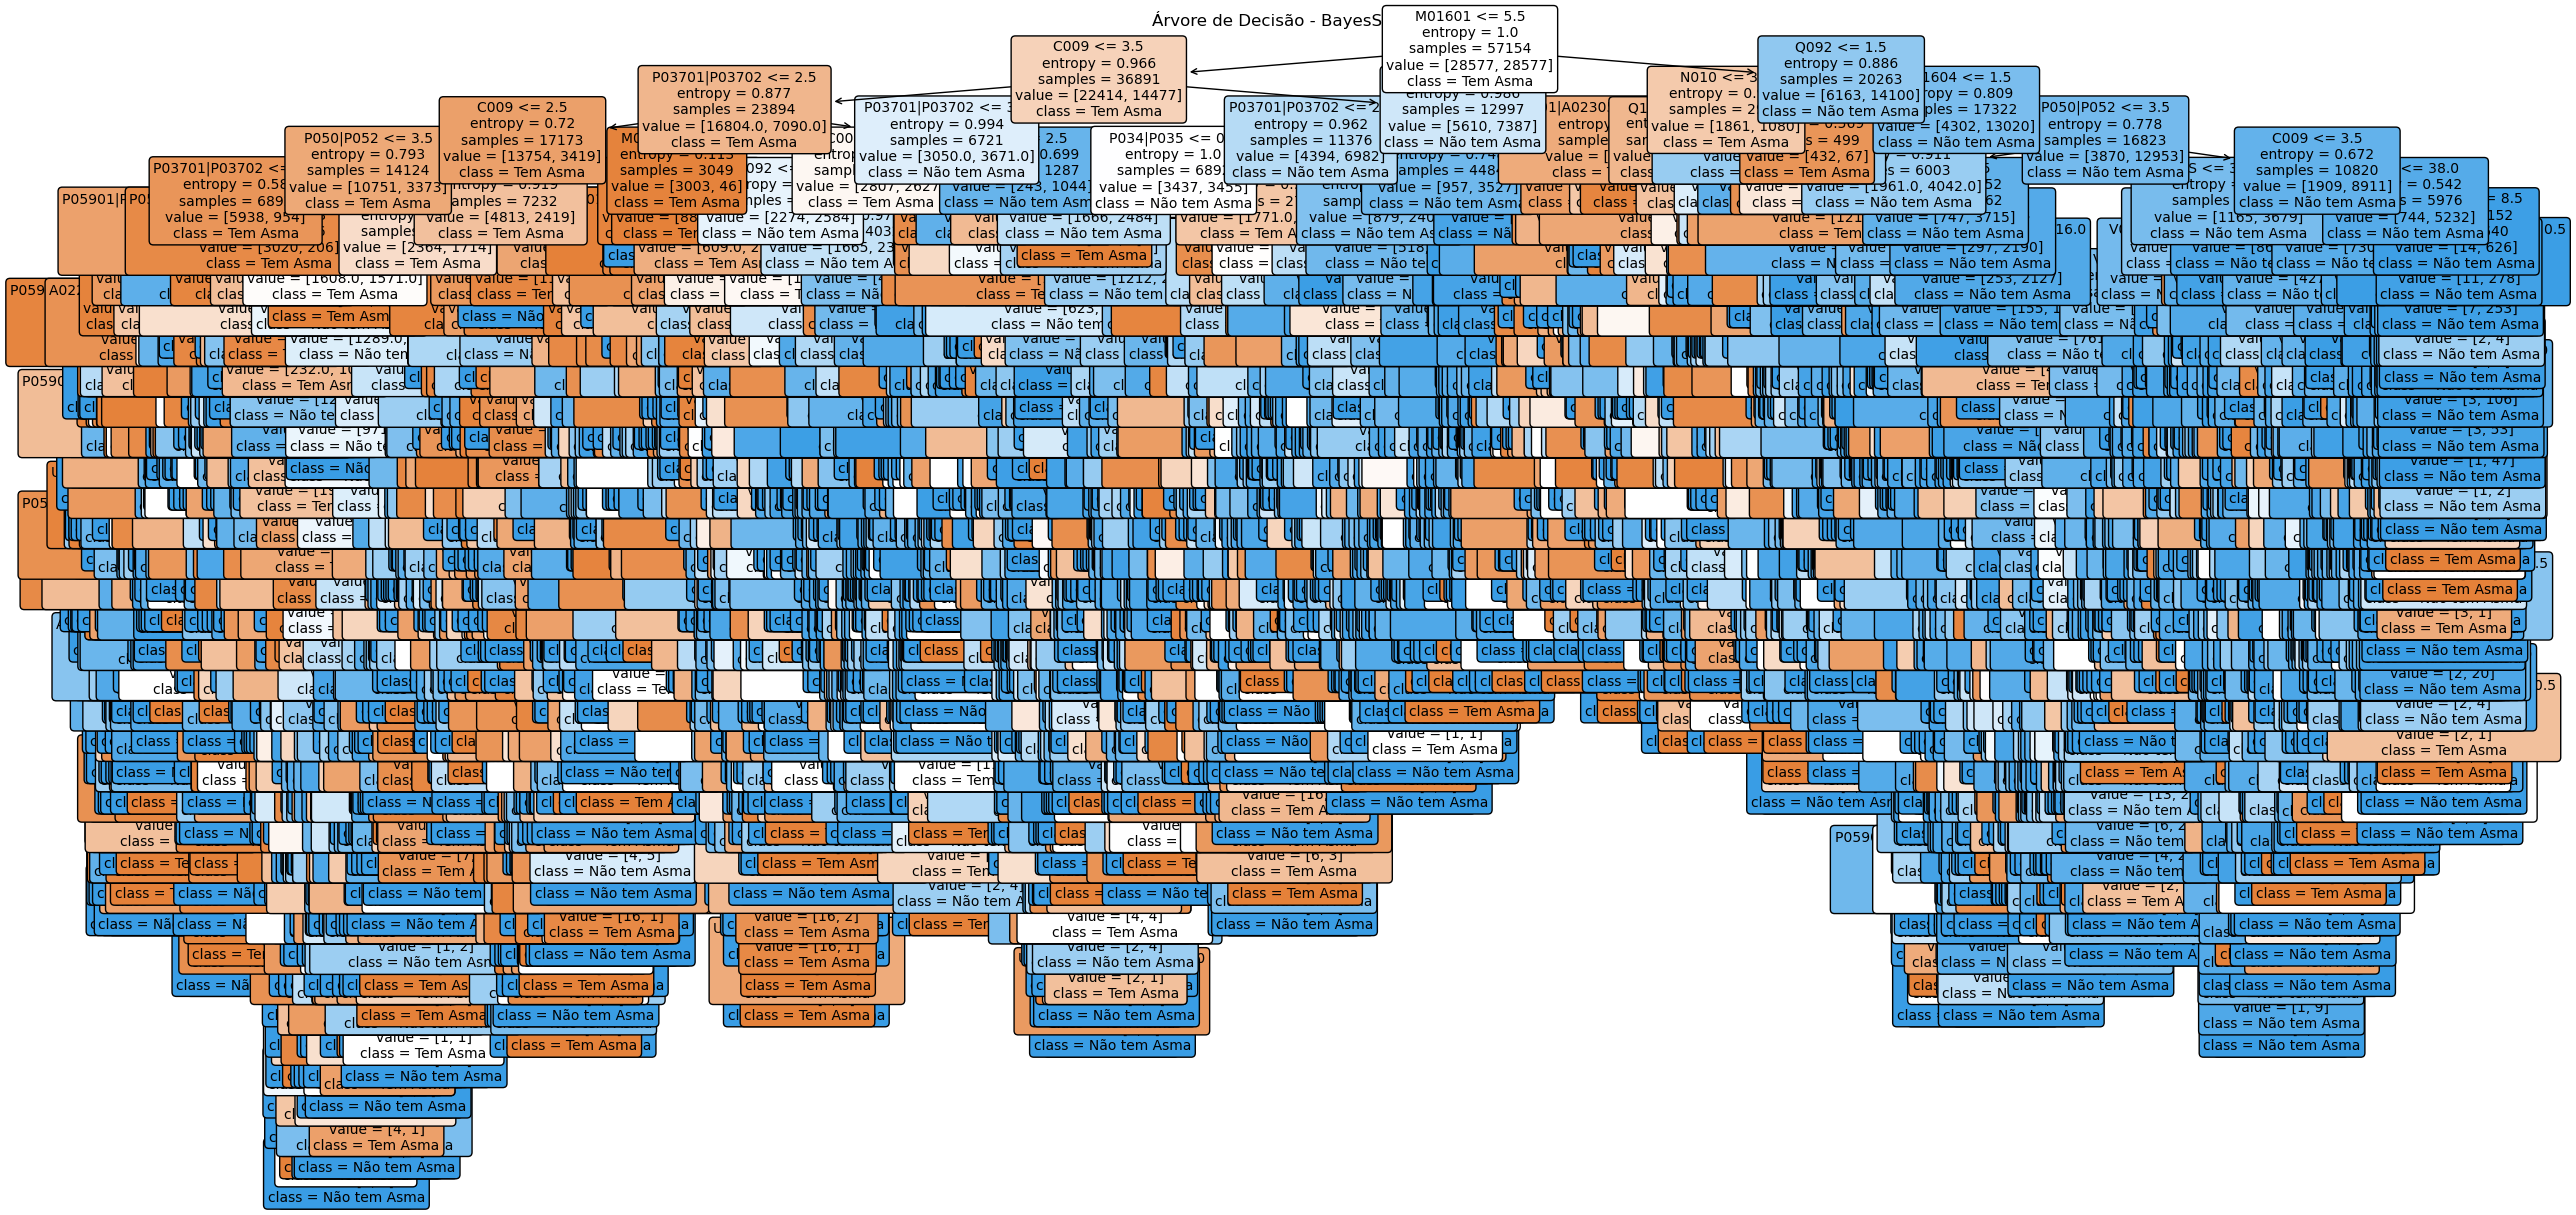

In [20]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [21]:
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [22]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.07      0.18      0.11       676
           2       0.95      0.88      0.91     12229

    accuracy                           0.84     12905
   macro avg       0.51      0.53      0.51     12905
weighted avg       0.90      0.84      0.87     12905



### UnderSampling

In [23]:
grid_search.fit(X_treino_under, y_treino_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor pontuação de validação cruzada: 0.95


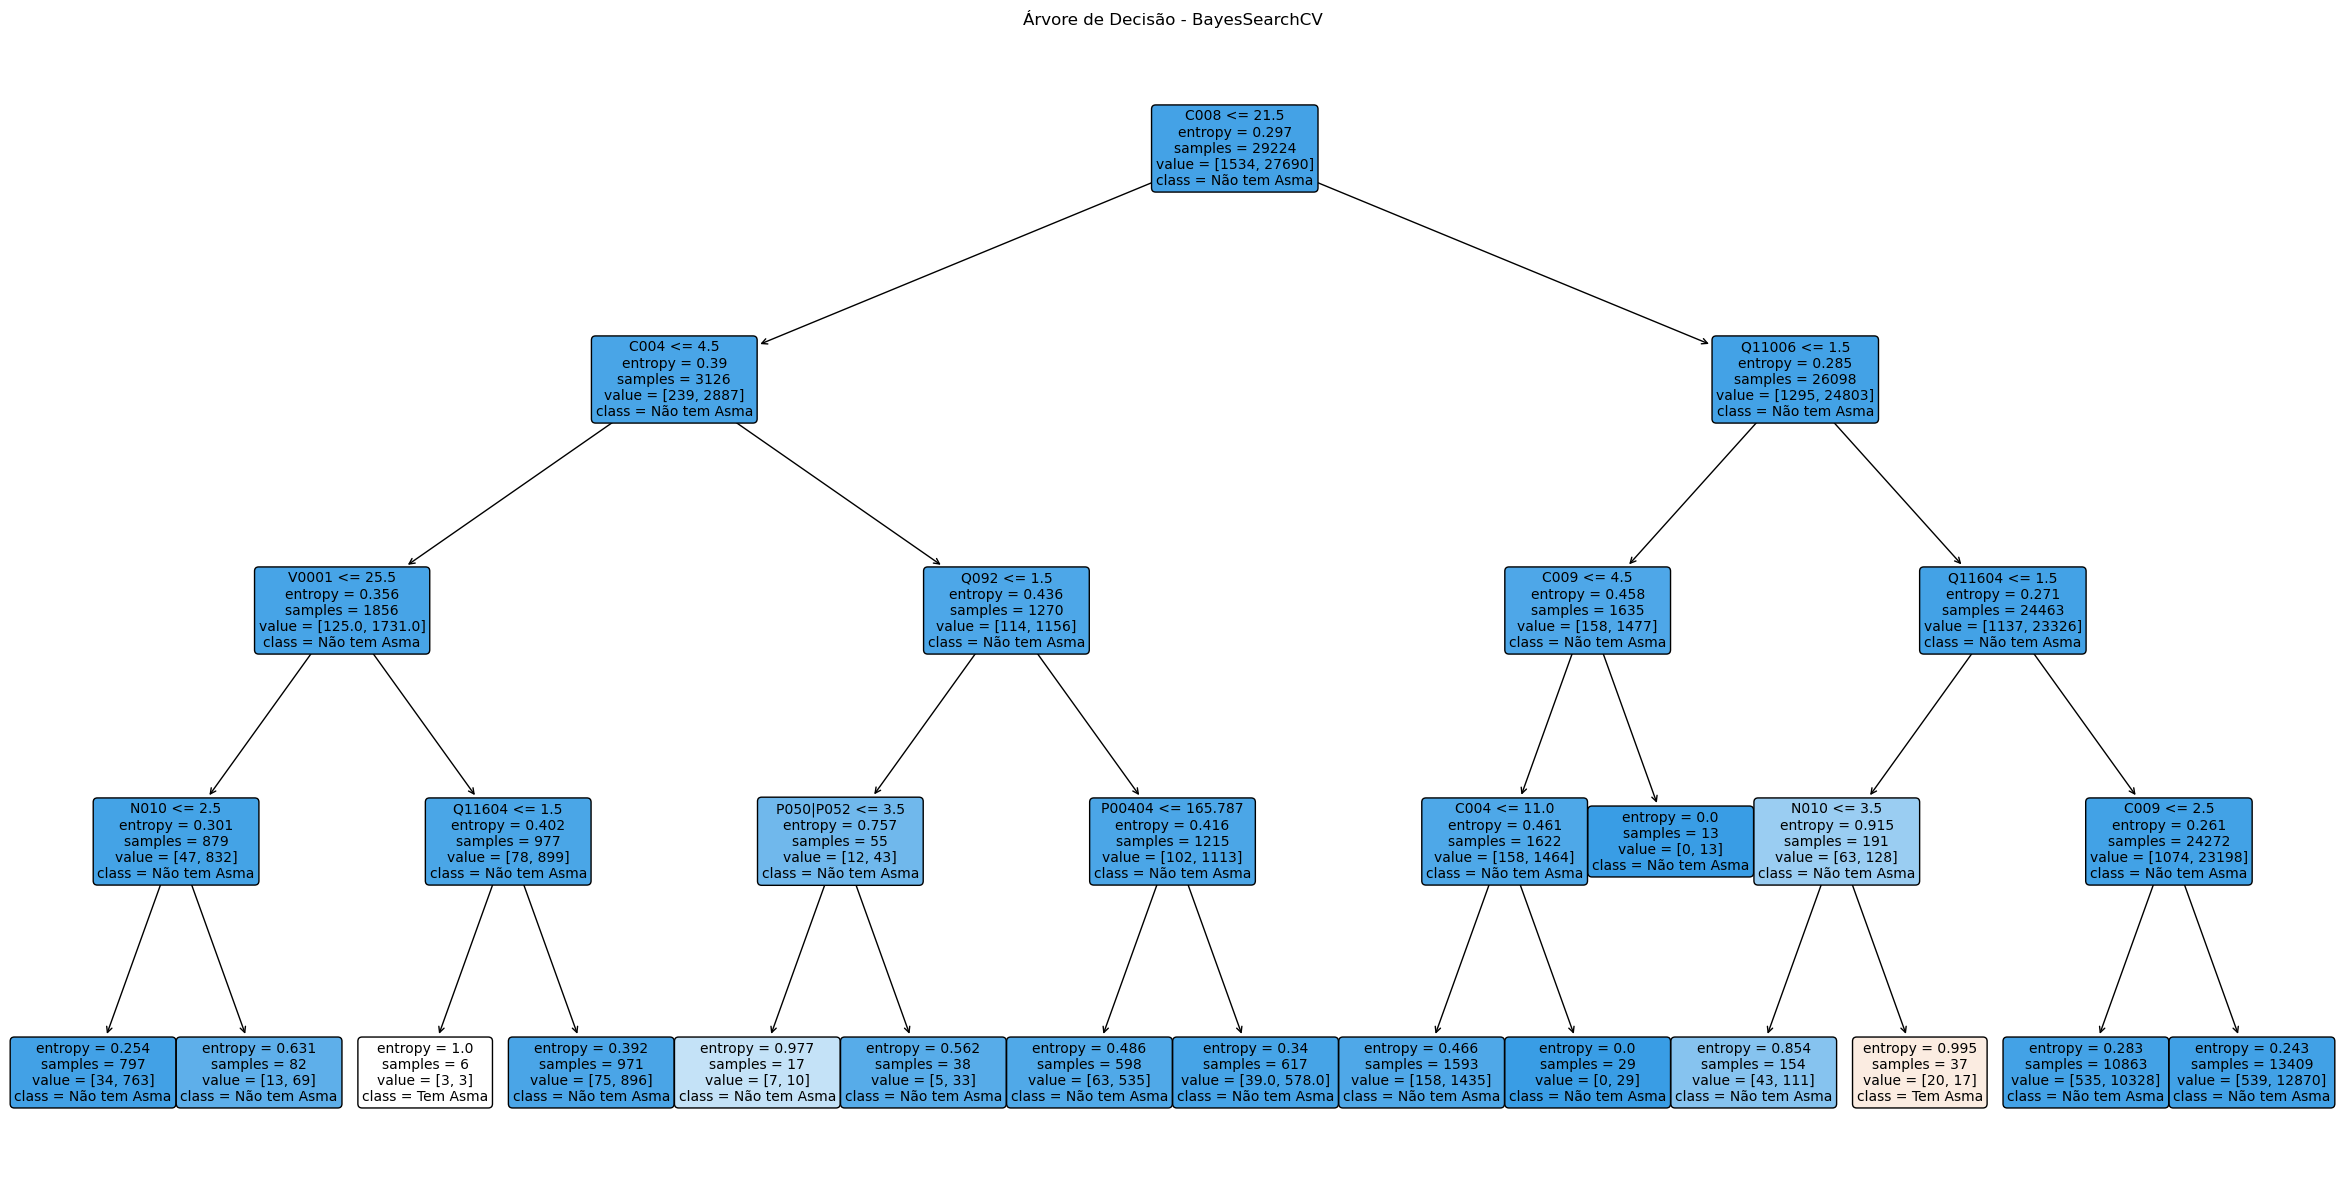

In [24]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [25]:
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [26]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.40      0.01      0.02       676
           2       0.95      1.00      0.97     12229

    accuracy                           0.95     12905
   macro avg       0.67      0.51      0.50     12905
weighted avg       0.92      0.95      0.92     12905



### Random UnderSampling

In [27]:
grid_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 0.57


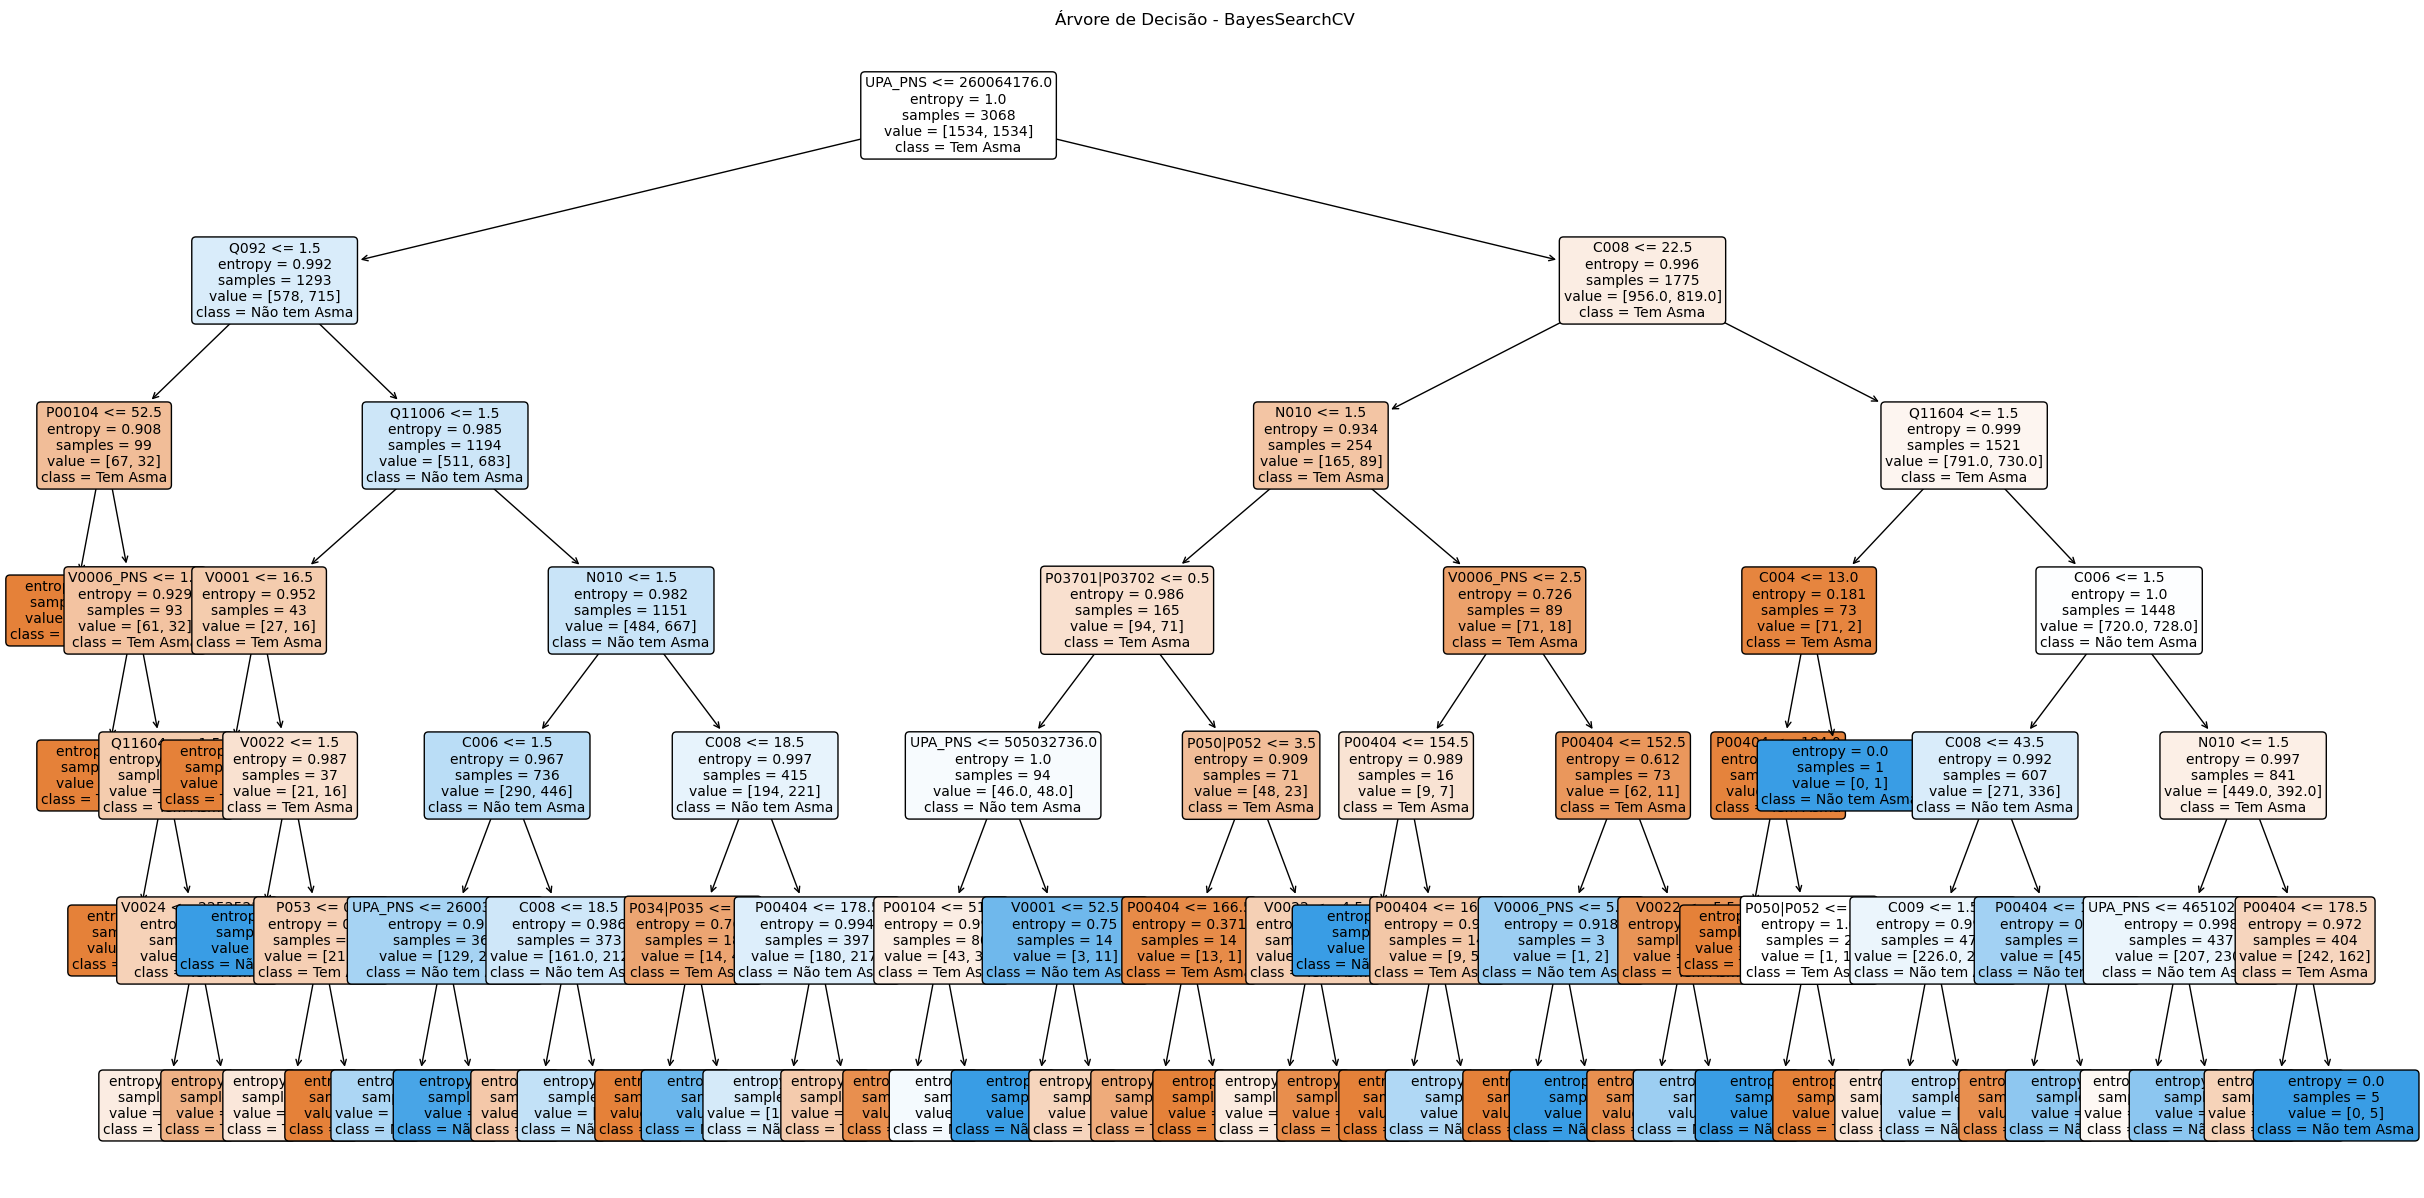

In [28]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [29]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [30]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.07      0.54      0.12       676
           2       0.96      0.60      0.74     12229

    accuracy                           0.60     12905
   macro avg       0.51      0.57      0.43     12905
weighted avg       0.91      0.60      0.71     12905



### DSTO

In [31]:
grid_search.fit(X_treino_DSTO, y_treino_DSTO)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 0.97


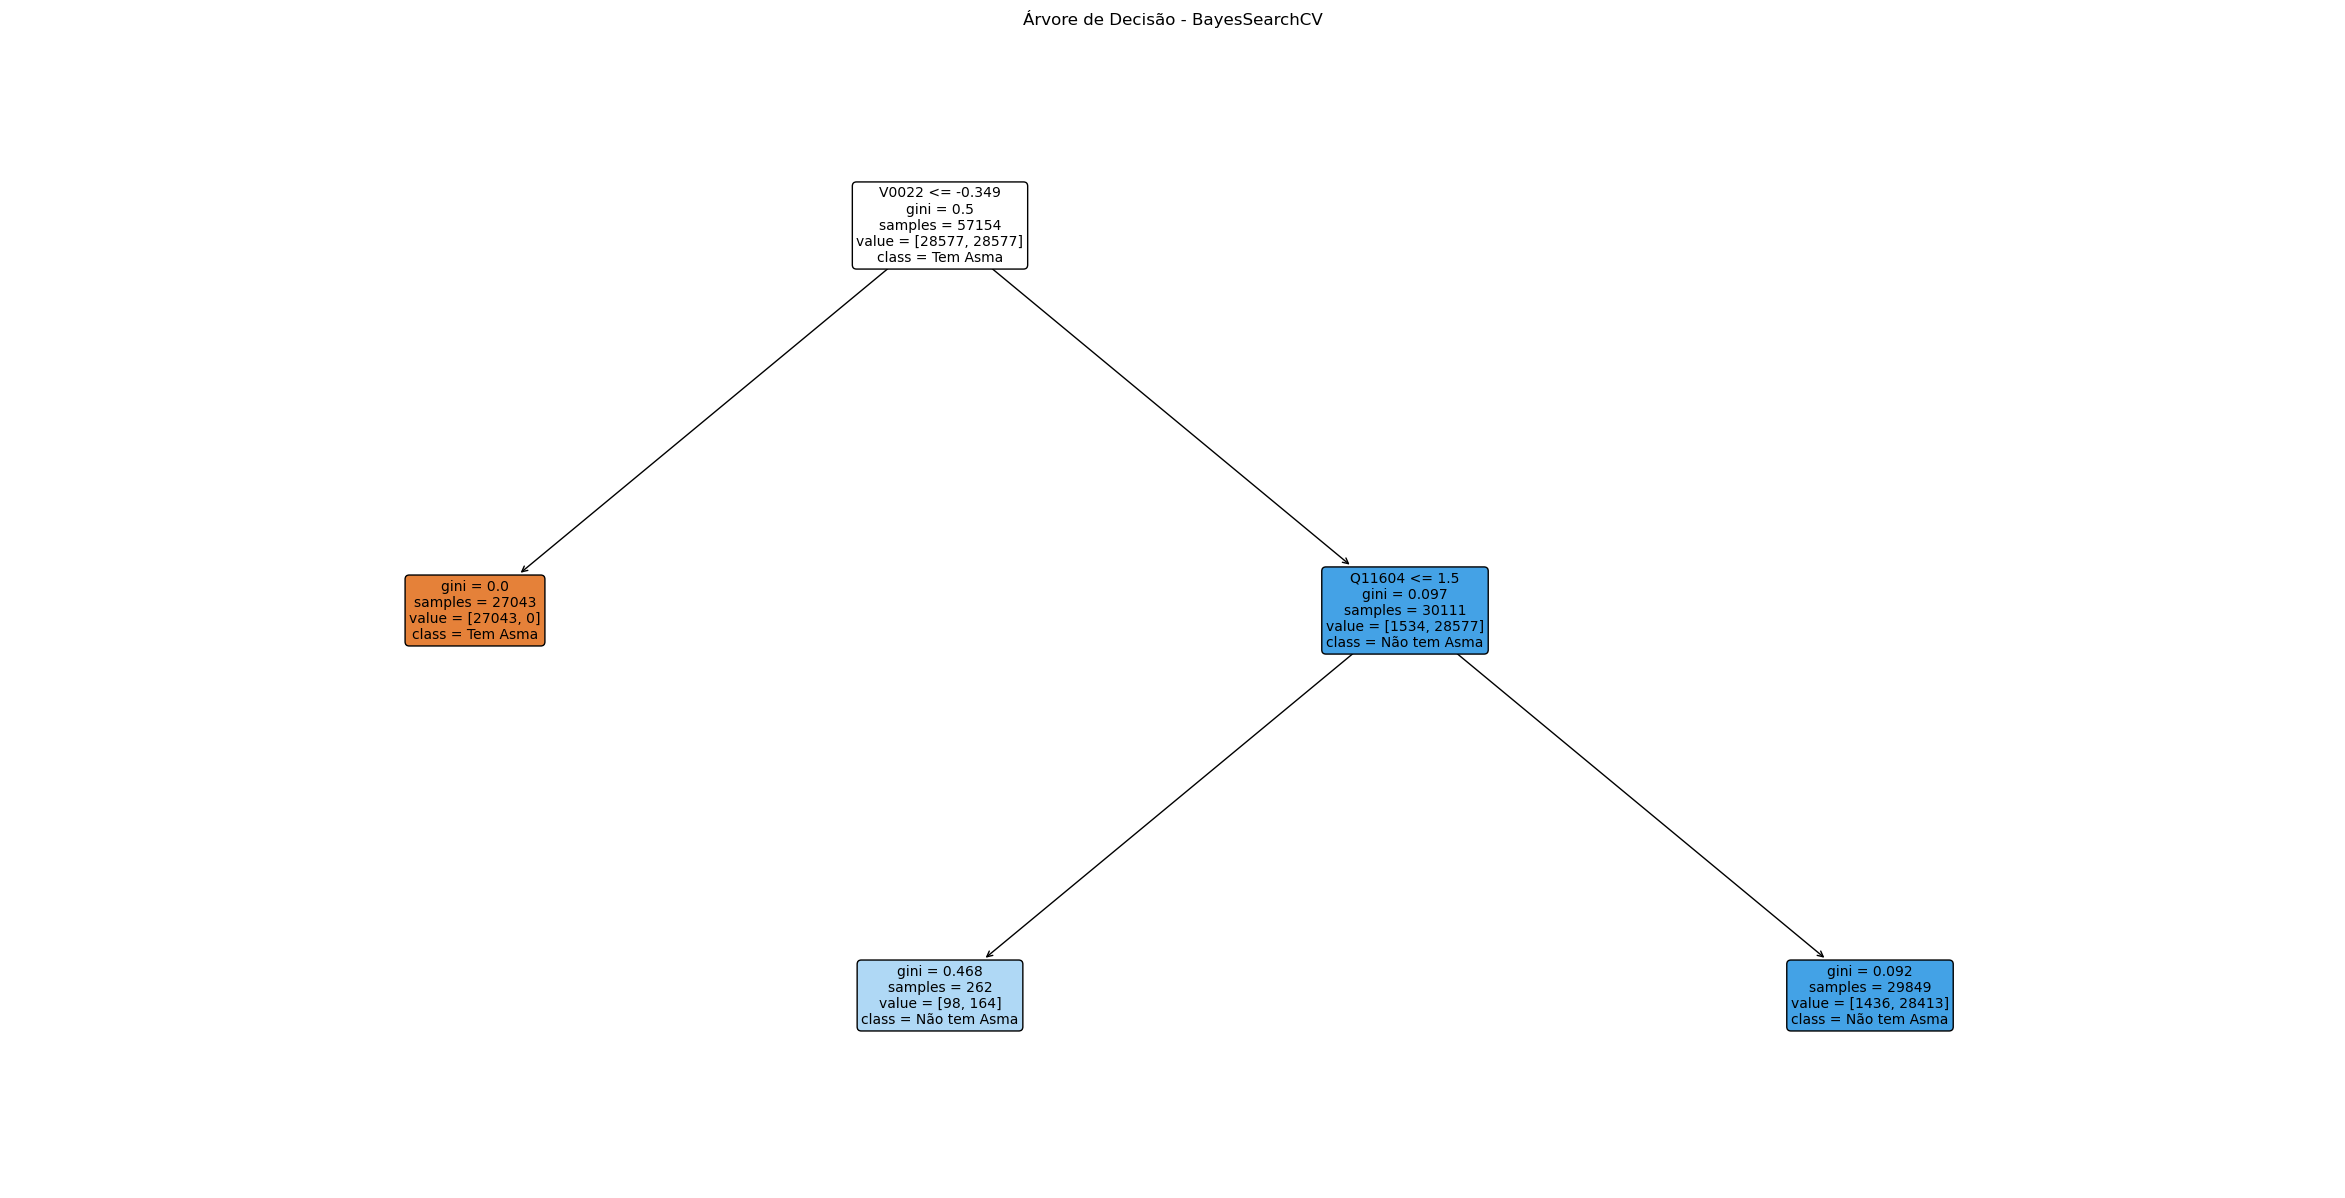

In [32]:
best_model_bayes = grid_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Tem Asma', 'Não tem Asma'], "Árvore de Decisão - BayesSearchCV")

In [33]:
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [34]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       676
           2       0.95      1.00      0.97     12229

    accuracy                           0.95     12905
   macro avg       0.47      0.50      0.49     12905
weighted avg       0.90      0.95      0.92     12905



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
